<a href="https://colab.research.google.com/github/addicted-ai/bear-classification-test/blob/main/Bear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 6.9MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 194kB 12.3MB/s 
     |████████████████████████████████| 1.2MB 14.5MB/s 
     |████████████████████████████████| 61kB 10.1MB/s 
     |████████████████████████████████| 61kB 10.9MB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *

In [4]:
bear_types = ['grizzly','black','teddy']
path = Path('bears')

In [7]:
!pip install DuckDuckGoImages
import DuckDuckGoImages as ddg

In [8]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        ddg.download(f'{o} bear', folder=dest,max_urls=100,thumbnails=True,parallel=True)

In [9]:
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink);

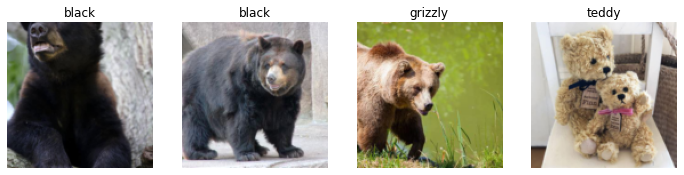

In [10]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

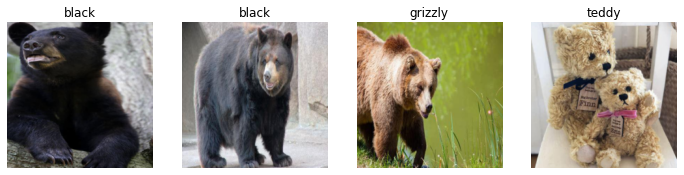

In [12]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [13]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.711830,0.170895,0.100000,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.359250,0.041415,0.000000,00:02
1,0.228613,0.025447,0.000000,00:02
2,0.167443,0.022085,0.000000,00:02


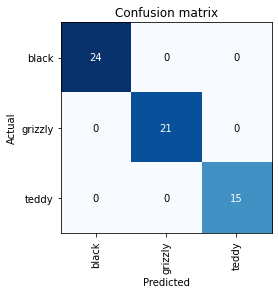

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

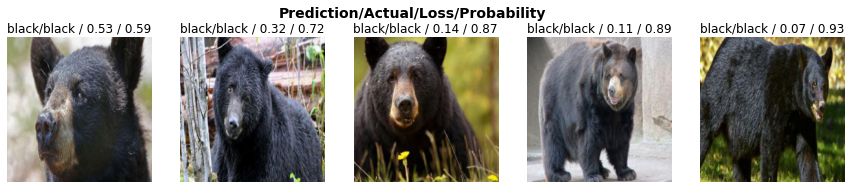

In [15]:
interp.plot_top_losses(5, nrows=1)

In [16]:
learn.export()

In [ ]:
learn_inf = load_learner('gdrive/MyDrive/export.pkl')

In [ ]:
test = '/gdrive/MyDrive/Grizzly-bear-protections-west-OG.jpg'

In [17]:
learn.predict('/content/gdrive/MyDrive/Grizzly-bear-protections-west-OG.jpg')

('grizzly', tensor(1), tensor([8.1515e-04, 9.9865e-01, 5.3690e-04]))